In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

import statsmodels.api as sm

import seaborn as sns
import numpy as np

In [5]:
experiment_rsv = pd.read_pickle("DATASET\\experiment_rsv.pkl")
classification_data = pd.read_pickle("DATASET\\classification_data.pkl")

### Графики

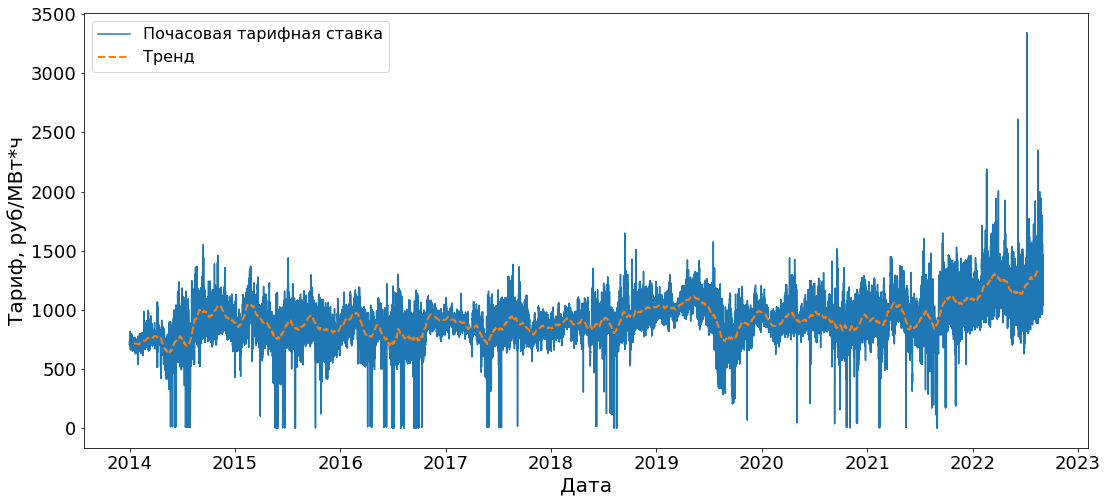

In [44]:
decomposition = sm.tsa.seasonal_decompose(experiment_rsv['ats_price'], model = 'additive', period=24*30)

plt.rcParams.update({'axes.titlesize': 20,
                    'xtick.labelsize': 18,
                    'ytick.labelsize': 18,
                    'legend.fontsize' : 16,
                    'axes.labelsize': 20})

plt.figure(figsize=(18,8))
plt.plot(experiment_rsv['ats_price'], label='Почасовая тарифная ставка')
plt.plot(decomposition.trend, ls='--', lw=2, label='Тренд')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Тариф, руб/МВт*ч');

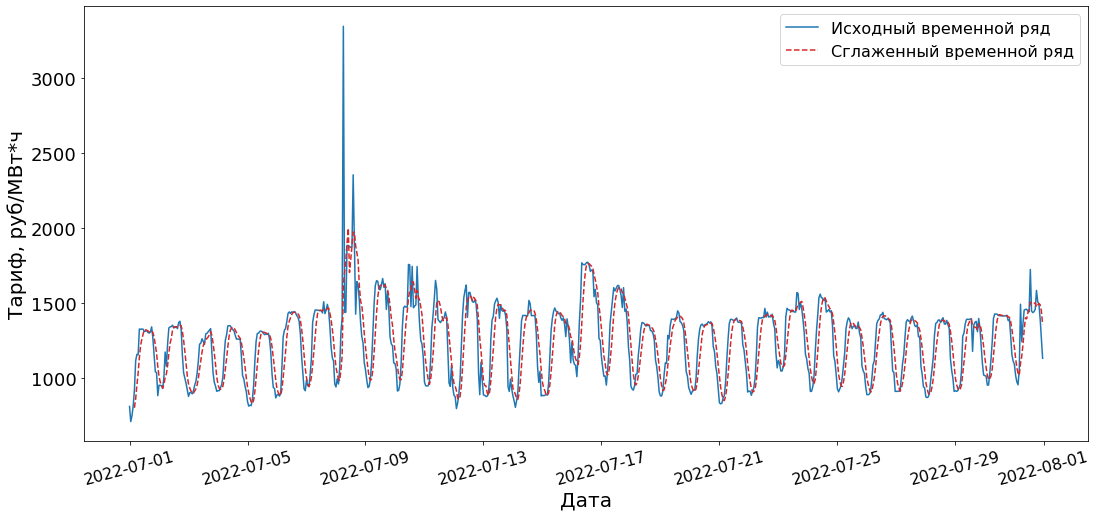

In [45]:
plt.rcParams.update({'axes.titlesize': 20,
                    'xtick.labelsize': 18,
                    'ytick.labelsize': 18,
                    'legend.fontsize' : 16,
                    'axes.labelsize': 20})

plt.figure(figsize=(18,8))
plt.plot(experiment_rsv['ats_price'].loc['2022-07'], label='Исходный временной ряд')
plt.plot(experiment_rsv['ats_price'].loc['2022-07'].rolling(5).mean(), ls='--', c='tab:red', label='Сглаженный временной ряд')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Тариф, руб/МВт*ч');
plt.tick_params(axis='x', which='major', labelsize=16, rotation=15)

### Корреляционный анализ

<AxesSubplot:>

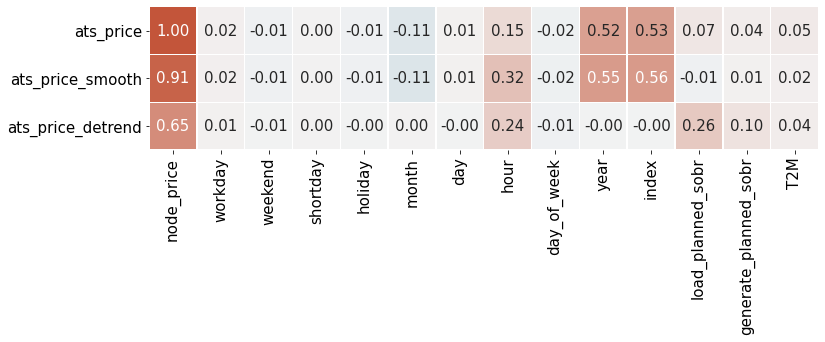

In [9]:
decomposition = sm.tsa.seasonal_decompose(classification_data[['ats_price']], model = 'additive', period=24)

classification_data['ats_price_smooth'] = classification_data['ats_price'].rolling(5).mean()
classification_data['ats_price_detrend']   = decomposition.seasonal + decomposition.resid

corr = classification_data.corr()
corr = corr[['ats_price', 'ats_price_smooth', 'ats_price_detrend']].transpose().drop(columns=['ats_price', 'ats_price_smooth', 'ats_price_detrend'])

plt.rcParams.update({'axes.titlesize': 15,
                    'xtick.labelsize': 15,
                    'ytick.labelsize': 15,
                    'legend.fontsize' : 15,
                    'axes.labelsize': 15})

f, ax = plt.subplots(figsize=(12, 12))
cmap = sns.diverging_palette(230, 20, as_cmap=True)


sns.heatmap(corr, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar=False, 
            annot=True, fmt=".2f", annot_kws={"size":15})